In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
#Reading CSVs
m_data = pd.read_csv('Environment_Temperature_change_filtered_Mdata.csv')
y_data = pd.read_csv('Environment_Temperature_change_filtered_Ydata.csv')
#Dropping unncessary columns
y_data1 = y_data.drop(['Area Code','Months Code','Element Code','Element','Unit'], axis=1)
#Meteorlogical Year Mean Temperature Changes (Transposed)
y_data2 = y_data1.transpose()
y_data2

,0,1
Area,South America,Northern America
Months,Meteorological year,Meteorological year
Y1961,0.116,0.017
Y1962,-0.139,-0.058
Y1963,0.139,0.372
...,...,...
Y2016,1.242,2.273
Y2017,1.232,1.426
Y2018,1.034,0.873
Y2019,1.31,1.179


In [4]:
m_data1 = m_data.dropna(axis=0, how='all')
m_data1 = m_data1.drop(['Area Code','Months Code','Element Code','Element','Unit'], axis=1)
#Monthly Mean Temperature Changes (Raw)
m_data1.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
0,South America,January,0.015,-0.154,-0.022,0.227,-0.292,0.299,-0.142,-0.149,...,0.702,0.662,1.050,0.963,1.149,1.571,1.157,0.914,1.230,0.431
2,South America,February,-0.128,-0.021,-0.131,0.180,0.059,-0.306,-0.136,-0.251,...,0.467,0.541,0.746,0.580,0.837,1.774,0.972,0.825,1.149,0.376
4,South America,March,-0.098,0.192,-0.086,-0.261,-0.523,0.019,-0.317,-0.468,...,0.318,0.676,0.601,0.494,1.122,1.357,0.922,0.988,0.952,0.414
6,South America,April,0.064,-0.109,0.305,0.204,-0.148,0.269,0.293,-0.750,...,0.942,0.937,1.024,1.022,1.587,1.491,1.015,1.548,1.609,0.587
8,South America,May,0.499,-0.406,-0.152,0.045,-0.186,0.209,0.901,-0.968,...,0.529,0.993,0.961,0.947,1.384,0.740,1.472,1.190,1.479,0.448


In [5]:
#Splitting DataFrame into two separate frames based on region
m_data_na = m_data1[m_data1['Area']=='Northern America']
m_data_sa = m_data1[m_data1['Area']=='South America']
#North America Monthly Mean Temp Changes
m_data_na.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
32,Northern America,January,0.699,-0.515,-0.618,1.222,0.084,-2.178,1.111,-0.465,...,1.960,2.216,2.024,2.418,1.927,4.029,3.629,2.110,1.717,1.001
34,Northern America,February,0.684,-0.845,0.644,0.689,-1.880,0.057,-1.604,-0.083,...,0.358,3.370,1.569,-0.589,-0.797,3.244,3.050,0.739,-0.535,0.648
36,Northern America,March,-0.243,0.481,-0.052,-2.683,-0.465,0.832,-0.347,2.046,...,0.753,2.997,1.237,-0.694,1.957,3.381,1.193,2.016,2.248,0.931
38,Northern America,April,-0.700,-0.152,0.896,-0.786,0.347,-0.847,-0.936,0.142,...,-0.148,1.815,-0.829,0.122,1.187,1.258,1.350,-0.739,1.149,0.459
40,Northern America,May,-0.600,-0.259,-0.136,-0.023,0.118,-0.325,-0.878,-0.529,...,0.237,1.523,0.252,1.042,1.190,1.486,0.989,1.549,0.695,0.344


In [6]:
#Transpose column headers (NA)
m_data_na1 = m_data_na.transpose()
m_data_na1

,32,34,36,38,40,42,44,46,48,50,52,54
Area,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America,Northern America
Months,January,February,March,April,May,June,July,August,September,October,November,December
Y1961,0.699,0.684,-0.243,-0.7,-0.6,0.552,0.153,0.37,-0.559,-0.727,-0.273,-1.117
Y1962,-0.515,-0.845,0.481,-0.152,-0.259,0.007,-0.326,0.202,-0.163,1.171,0.813,0.91
Y1963,-0.618,0.644,-0.052,0.896,-0.136,-0.168,0.119,0.037,0.319,2.08,0.438,-0.336
...,...,...,...,...,...,...,...,...,...,...,...,...
Y2016,4.029,3.244,3.381,1.258,1.486,1.64,1.173,1.358,1.498,1.3,3.742,0.469
Y2017,3.629,3.05,1.193,1.35,0.989,1.058,1.036,0.715,1.413,1.388,0.818,2.019
Y2018,2.11,0.739,2.016,-0.739,1.549,0.992,1.18,0.678,0.344,-0.109,-0.3,2.582
Y2019,1.717,-0.535,2.248,1.149,0.695,0.902,0.998,0.912,1.845,0.726,0.906,2.178


In [7]:
#South America Mean Temp Changes(Raw)
m_data_sa.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
0,South America,January,0.015,-0.154,-0.022,0.227,-0.292,0.299,-0.142,-0.149,...,0.702,0.662,1.050,0.963,1.149,1.571,1.157,0.914,1.230,0.431
2,South America,February,-0.128,-0.021,-0.131,0.180,0.059,-0.306,-0.136,-0.251,...,0.467,0.541,0.746,0.580,0.837,1.774,0.972,0.825,1.149,0.376
4,South America,March,-0.098,0.192,-0.086,-0.261,-0.523,0.019,-0.317,-0.468,...,0.318,0.676,0.601,0.494,1.122,1.357,0.922,0.988,0.952,0.414
6,South America,April,0.064,-0.109,0.305,0.204,-0.148,0.269,0.293,-0.750,...,0.942,0.937,1.024,1.022,1.587,1.491,1.015,1.548,1.609,0.587
8,South America,May,0.499,-0.406,-0.152,0.045,-0.186,0.209,0.901,-0.968,...,0.529,0.993,0.961,0.947,1.384,0.740,1.472,1.190,1.479,0.448


In [8]:
#Transpose column headers (SA)
m_data_sa1 = m_data_sa.transpose()
m_data_sa1

,0,2,4,6,8,10,12,14,16,18,20,22
Area,South America,South America,South America,South America,South America,South America,South America,South America,South America,South America,South America,South America
Months,January,February,March,April,May,June,July,August,September,October,November,December
Y1961,0.015,-0.128,-0.098,0.064,0.499,-0.406,-0.116,0.712,0.275,0.347,0.223,-0.14
Y1962,-0.154,-0.021,0.192,-0.109,-0.406,-0.526,-1.026,-0.038,0.398,-0.27,0.432,0.15
Y1963,-0.022,-0.131,-0.086,0.305,-0.152,-0.09,0.447,0.393,0.268,0.649,-0.067,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...
Y2016,1.571,1.774,1.357,1.491,0.74,0.415,1.372,1.645,0.872,1.133,0.922,1.147
Y2017,1.157,0.972,0.922,1.015,1.472,1.37,1.259,1.749,1.582,1.28,0.866,1.153
Y2018,0.914,0.825,0.988,1.548,1.19,0.449,0.814,0.546,1.567,1.307,1.106,0.831
Y2019,1.23,1.149,0.952,1.609,1.479,1.983,1.028,0.993,1.551,1.245,1.667,1.276


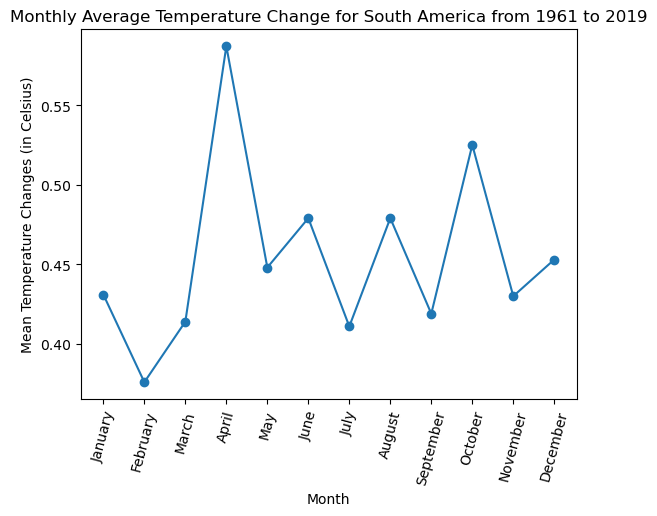

In [12]:
#plot the monthly average temperature change for South America from 1961 to 2019
y = m_data_sa1.loc['YearSpanAvg',:]
x = range(len(y))


plt.plot(x,y, marker="o")
plt.xlabel('Month')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Monthly Average Temperature Change for South America from 1961 to 2019")

tick_locations = [value for value in x]
plt.xticks(tick_locations, ["January","February","March","April","May","June", 
                            "July", "August", "September", "October", "November", "December"], rotation = 75)
plt.show()

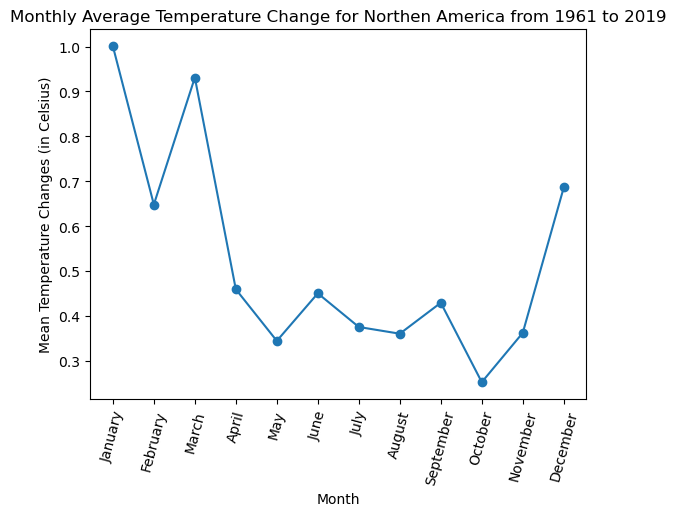

In [13]:
y = m_data_na1.loc['YearSpanAvg',:]
x = range(len(y))


plt.plot(x,y, marker="o")
plt.xlabel('Month')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Monthly Average Temperature Change for Northen America from 1961 to 2019")

tick_locations = [value for value in x]
plt.xticks(tick_locations, ["January","February","March","April","May","June", 
                            "July", "August", "September", "October", "November", "December"], rotation = 75)
plt.show()